### Air resitance on a pebble

Verify the claim that the effects of air resistance on a falling pebble can be appreciable. Compute the speed at which a pebble reaches the ground if i is dropped from rest at a height of 100 m. Compare this speed to that of a freely falling object under the same conditions. Assume the drag force is proportional to $v^2$ and the terminal velocity of the pebble is 30 m/s.

Recall from physics that the sum of forces includes both gravity and quadratic drag, and is

$$F_d = -mg + C_2 v^2,$$

where down is in the negative direction. Observing that at terminal velocity the sum of forces is zero, this can be re-written in terms of a terminal velocity, $v_t$ as

$$F_d = -mg\left(1 - \frac{v^2}{v_t^2}\right).$$

From Newton, we know force is mass times acceleration, which is the first derivative of velocity. We also know that velocity is the derivative of position. Using this, we arrive at a second order (second derivative), ordinary differential equation

$$F_d = m\frac{dv}{dt} = m\frac{d^2x}{dt^2} = -mg\left(1 - \frac{v^2}{v_t^2}\right).$$

This is solved by creating *a pair* of frist order ODEs. Canceling the mass on both sides gives:

$$ \frac{dv}{dt} = -mg\left(1 - \frac{v^2}{v_t^2}\right),$$

$$ \frac{dx}{dt} = v$$.

This pair of equations is to be solved using an Euler method of your own devising.

To check your results, use the analytic solution to determine the time a pebble takes to fall to Earth in the absence of air resistance. The position is found from

$$x(t) = -\frac{1}{2}gt^2 + x_o.$$

and the time can be solved for by solving for $t$ when $x(t)$=0,

$$t = \sqrt{\frac{2x_o}{g}}$$.

### The Euler method

Recall from in-class lecture notes, the Euler method is

$$x(t+dt) = x(t) + f(x,t) dt$$

Where 

$$f(x,t) = \frac{dx}{dt}$$

Note that in most interesting cases, x is not a single value, but a set of values. For example in our current problem $x$ will be the position and the velocity, or

$$\mathbf{x} = \left(x,\frac{dx}{dt}\right)$$


In [1]:
from numpy import array,sqrt

# Assign values to physical constants like gravity and terminal velocity here.
gravity=9.81 #m/s**2
t_vel=55.56 #terminal velocity in m/s

# They will then be visible within the functions that follow.

#the values in x are [position, velocity]

def euler(f,x,t,dt):
    """
    This function will integrate forward in time using the Euler method.
    This function takes the state of some system at time t described by x(t), 
    and returns the state x(t+dt)

    INPUTS:
    f = a user written function that takes x,t as inputs and return dx/dt for each input. 
        Note that both x and dx/dt are numpy arrays.
    x = a numpy array of values describing the state of the system at time t.
    t = the time corresponding to the values x
    dt = the time step to be taken

    OUTPUTS:
    a numpy array for x(t+dt)

    """
    
    #all we do is find teh next thing to occur according to the function
    #this is done by multiplying the derivatives (the values teh inputted function returns)
    #by the tiem step and adding that to the original values
    #tiemstep multiplied by derivatives equals change in thing
    return x+(f(x,t))*dt

def pebble(xm,t):
    return array([xm[1],-gravity*(1-(xm[1]/t_vel)**2)])


#teh analytical method of finding the time to hit the ground
def analytic_t(x_i):
    return sqrt((2*x_i[0])/gravity)

#euler richardson function
def eurich(f,x,t,dt):
    tm=t+(dt/2) #calculatign the midpoint time
    xm=x+f(x,t)*(dt/2) #calculatign the midpoint position
    fm=f(xm,tm) #calculatign the midpoint slopes
    xf=x+fm*dt #calculatign the final xposition as estimated by the slope at the midpoint
    return xf

In [13]:
# The initial conditions for the problem
x0 = array([100,0])  
t_s = 0    # Starting time
dt= 0.00000001 # Make this lower until the results match the analytic values.

# Compare the results of doing the problem with the Euler method to doing the analytic approach
tnew=analytic_t(x0)
print(tnew)

4.51523640986


In [18]:
# The initial conditions for the problem
x0 = array([100,0])  
t_s = 0    # Starting time
dt= 0.000001 # Make this lower until the results match the analytic values.

# Write a while loop that will integrate the problem forward in time 
# UNTIL the pebble reaches the ground at x0==0
#interpolation is necessary fo rmore accurate estimates
int_set=[0,0]

while x0[0]>0:
    int_set[0]=[t_s,x0[0]] #capturing the before values
    x0=euler(pebble,x0,t_s,dt)
    t_s=t_s+dt
    int_set[1]=[t_s,x0[0]] #capturing the after values

#doign the interpolation
int_t=(int_set[0][0]+int_set[1][0])/2 #averaging them
int_x=(int_set[0][1]+int_set[1][1])/2
intpol=[int_t,int_x]
print(intpol)

[4.757751500311125, 5.5169654559732913e-06]


[  1.00000000e-04   2.00000000e-04   3.00000000e-04 ...,   1.99800000e-01
   1.99900000e-01   2.00000000e-01]


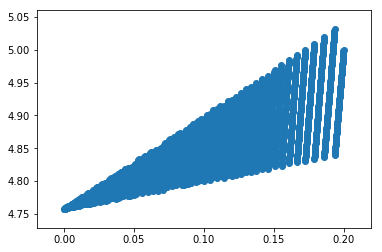

In [10]:
#comparative look at how euler behaves
from pylab import arange, scatter, show
dt_set=arange(0.0001,0.2,0.0001)
print(dt_set)
x_set=dt_set
y_set=[]

# do it withour air resistance with euler
for i in dt_set:
    x0 = array([100,0]) 
    t_s=0
    dta=i
    while x0[0]>0:
        x0=euler(pebble,x0,t_s,dta)
        t_s=t_s+dta
    y_set.append(t_s)
    
scatter(x_set,y_set)
show()

In [21]:
# The initial conditions for the problem
x0 = array([100,0])  
t_s = 0    # Starting time
dt= 0.00001 # Make this lower until the results match the analytic values.

# do it with air resistance.
while x0[0]>0:
    x0=euler(pebble,x0,t_s,dt)
    if x0[1]>t_vel:
        x0[1]=t_vel
    t_s=t_s+dt
    
print(t_s,x0[0])

4.75775999998905 -0.0001787751526


In [19]:
## The initial conditions for the problem
#Euler-Richardson approach can actually get the rigth answer at one point!!!
x0 = array([100,0])  
t_s = 0    # Starting time
dt=1

#interpolation is necessary fo rmore accurate estimates
int_set=[0,0]

while x0[0]>0:
    int_set[0]=[t_s,x0[0]] #capturing the before values
    x0=eurich(pebble,x0,t_s,dt)
    t_s=t_s+dt
    int_set[1]=[t_s,x0[0]] #capturing the after values

#doign the interpolation
int_t=(int_set[0][0]+int_set[1][0])/2
int_x=(int_set[0][1]+int_set[1][1])/2
intpol=[int_t,int_x]
print(intpol)

[4.5, 8.2312807128436951]


[  1.00000000e-04   2.00000000e-04   3.00000000e-04 ...,   9.99700000e-01
   9.99800000e-01   9.99900000e-01]


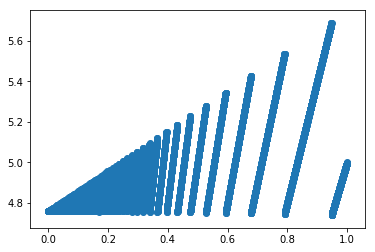

In [34]:
#trying to debug
from pylab import arange, scatter, show
dt_set=arange(0.0001,1,0.0001)
print(dt_set)
x_set=dt_set
y_set=[]

# do it withour air resistance with euler richardson
for i in dt_set:
    x0 = array([100,0]) 
    t_s=0
    dta=i
    while x0[0]>0:
        x0=eurich(pebble,x0,t_s,dta)
        t_s=t_s+dta
    y_set.append(t_s)
    
scatter(x_set,y_set)
show()

In [32]:
## The initial conditions for the problem
x0 = array([100,0])  
t_s = 0    # Starting time
dt=0.948

# do it with air resistance with euler richardson
while x0[0]>0:
    x0=eurich(pebble,x0,t_s,dt)
    if x0[1]>t_vel:
        x0[1]=t_vel
    t_s=t_s+dt
    
print(t_s)

4.74
